In [1]:
import matplotlib.pyplot as plt
import numpy as np

from DQN_train import train_dqn
from DDQN_train import train_ddqn

In [2]:
def smooth(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)
    
def run_experiments(env_name, n_episodes, batch_size, hidden_dim, lr, gamma, 
                   eps_start, eps_end, eps_decay_iters, zeta, mem_cap, seeds):
    
    all_dqn_durations = []
    all_ddqn_durations = []
    all_dqn_returns = []
    all_ddqn_returns = []
    
    for seed in seeds:
        dqn_durations, dqn_returns = train_dqn(env_name, n_episodes, batch_size, hidden_dim, lr, gamma, 
                                               eps_start, eps_end, eps_decay_iters, zeta, mem_cap, seed)

        ddqn_durations, ddqn_returns = train_ddqn(env_name, n_episodes, batch_size, hidden_dim, lr, gamma,
                                                  eps_start, eps_end, eps_decay_iters, zeta, mem_cap, seed)
        
        
        all_dqn_durations.append(np.array(dqn_durations))
        all_ddqn_durations.append(np.array(ddqn_durations))
        
        all_dqn_returns.append(np.array(dqn_returns))
        all_ddqn_returns.append(np.array(ddqn_returns))
    
    return all_dqn_durations, all_dqn_returns, all_ddqn_durations, all_ddqn_returns

def plot_run(res_dqn, res_ddqn, env_name='LunarLander', metric='returns', smooth=False):
    res_dqn = np.stack(res_dqn)
    avg_res_dqn = np.mean(res_dqn, axis=0)
    std_res_dqn = np.std(res_dqn, axis=0)
    
    res_ddqn = np.stack(res_ddqn)
    avg_res_ddqn = np.mean(res_ddqn, axis=0)
    std_res_ddqn = np.std(res_ddqn, axis=0)
    
    if smooth:
        avg_res_dqn = smooth(avg_res_dqn, 10)
        avg_res_ddqn = smooth(avg_res_ddqn, 10)
        
    x = np.arange(avg_res_dqn.shape[0])
        
    plt.plot(avg_res_dqn, label='DQN')
    plt.plot(avg_res_ddqn, label='DDQN')
    plt.fill_between(x, avg_res_dqn+std_res_dqn, avg_res_dqn-std_res_dqn, alpha=0.5)
    plt.fill_between(x, avg_res_ddqn+std_res_ddqn, avg_res_ddqn-std_res_ddqn, alpha=0.5)
    plt.title(f'Episode {metric} per episode on {env_name}')
    plt.xlabel('Episode')
    plt.ylabel(f'{metric.capitalize()}')
    plt.legend()
    plt.show()

def plot_results(results, env_name='CartPole', smooth=False):
    all_dqn_durations, all_dqn_returns, all_ddqn_durations, all_ddqn_returns = results
    
    plot_run(all_dqn_durations, all_ddqn_durations, env_name, metric='durations', smooth=smooth)    
    plot_run(all_dqn_returns, all_ddqn_returns, env_name, metric='returns', smooth=smooth)

Episode 0 finished after 116 steps with return -2.3101454523605027
Episode 10 finished after 1000 steps with return 3.9904442374014635
Episode 20 finished after 678 steps with return 2.769487641002316
Episode 30 finished after 73 steps with return -3.345308887664027
Episode 40 finished after 995 steps with return 10.389356562817746
Episode 50 finished after 672 steps with return 8.821243384515464
Episode 60 finished after 1000 steps with return 5.111408222225598
Episode 70 finished after 733 steps with return 1.8282763025744764
Episode 80 finished after 1000 steps with return 6.410115032731475
Episode 90 finished after 1000 steps with return 7.593813522346552
Episode 100 finished after 283 steps with return 5.780438983444201
Episode 110 finished after 574 steps with return 1.561056337143088
Episode 120 finished after 1000 steps with return 8.871899245876962
Episode 130 finished after 390 steps with return 1.9086130260448526
Episode 140 finished after 1000 steps with return 5.4769487158

Episode 200 finished after 484 steps with return 4.896916876992387
Episode 210 finished after 1000 steps with return 0.9692643207605386
Episode 220 finished after 339 steps with return 2.6108881730764564
Episode 230 finished after 353 steps with return 9.444795692244872
Episode 240 finished after 450 steps with return 3.1091335937906837
Episode 250 finished after 1000 steps with return 4.751226852585485
Episode 260 finished after 337 steps with return 2.735346888272673
Episode 270 finished after 422 steps with return 4.322214747939757
Episode 280 finished after 703 steps with return 5.979909301151264
Episode 290 finished after 498 steps with return 1.5025647272762108
Episode 300 finished after 715 steps with return 1.4338919074897658
Episode 310 finished after 520 steps with return 5.440220441460155
Episode 320 finished after 399 steps with return 3.2032004044051035
Episode 330 finished after 458 steps with return 2.8606499583603733
Episode 340 finished after 450 steps with return 3.62

Episode 400 finished after 363 steps with return 4.092119138134239
Episode 410 finished after 665 steps with return 2.9081009853655897
Episode 420 finished after 1000 steps with return 4.557150144271923
Episode 430 finished after 737 steps with return 2.142597213665087
Episode 440 finished after 383 steps with return 8.136141831265926
Episode 450 finished after 1000 steps with return 5.993423902977282
Episode 460 finished after 1000 steps with return 10.920146957453024
Episode 470 finished after 1000 steps with return 0.27043918715391513
Episode 480 finished after 1000 steps with return 3.257358422462407
Episode 490 finished after 1000 steps with return 7.043116325391189
DQN ran for 734.8794527053833 seconds on LunarLander-v2
Episode 0 finished after 83 steps with return 2.6046251012850274
Episode 10 finished after 338 steps with return 2.1728580171125698
Episode 20 finished after 431 steps with return 4.964606457322155
Episode 30 finished after 1000 steps with return 9.189114890927568

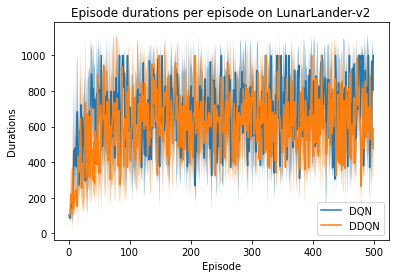

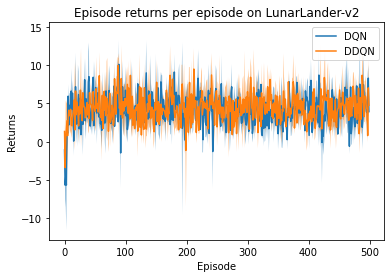

In [4]:
env_name = 'LunarLander-v2'

n_episodes = 500
batch_size = 64
hidden_dim = 128
lr = 1e-3
gamma = 0.8
eps_start = 1.0
eps_end = 0.05
eps_decay_iters = 500
# Zeta is not applicable in non stochastic environments
zeta = 0.05
mem_cap = 10000

seeds = [42, 126, 284]

results_lunarlander = run_experiments(env_name, n_episodes, batch_size, hidden_dim, lr, gamma, 
                eps_start, eps_end, eps_decay_iters, zeta, mem_cap, seeds)

plot_results(results_lunarlander, env_name)

Episode 0 finished after 116 steps with return -0.5639753522316894
Episode 10 finished after 399 steps with return -0.2863553271889113
Episode 20 finished after 1000 steps with return 3.4257668184851524
Episode 30 finished after 802 steps with return 1.8217167121438007
Episode 40 finished after 1000 steps with return 7.959327047541245
Episode 50 finished after 990 steps with return 11.873043544041217
Episode 60 finished after 497 steps with return 2.591994317180548
Episode 70 finished after 1000 steps with return 1.130820080958097
Episode 80 finished after 1000 steps with return 6.889835258253917
Episode 90 finished after 645 steps with return 6.271691158198399
Episode 100 finished after 823 steps with return 2.145805112127477
Episode 110 finished after 920 steps with return 2.9726580611468076
Episode 120 finished after 1000 steps with return 2.841083194842755
Episode 130 finished after 1000 steps with return 4.130602270708567
Episode 140 finished after 60 steps with return -0.80468445

Episode 200 finished after 133 steps with return -0.7233700053978539
Episode 210 finished after 574 steps with return 11.178209034486777
Episode 220 finished after 548 steps with return 6.989036703486968
Episode 230 finished after 900 steps with return 3.404310157603205
Episode 240 finished after 309 steps with return 5.449792544270755
Episode 250 finished after 369 steps with return 9.952790482660893
Episode 260 finished after 340 steps with return 3.128521005063456
Episode 270 finished after 347 steps with return 2.2809584161077883
Episode 280 finished after 423 steps with return 7.187138614749391
Episode 290 finished after 1000 steps with return 2.739947823619024
Episode 300 finished after 218 steps with return 3.0779660856314925
Episode 310 finished after 834 steps with return 3.9125792071270205
Episode 320 finished after 719 steps with return 3.16054497496849
Episode 330 finished after 429 steps with return 4.737888400684084
Episode 340 finished after 300 steps with return 3.13856

Episode 400 finished after 256 steps with return 3.253108525705403
Episode 410 finished after 659 steps with return 1.9831783204507962
Episode 420 finished after 1000 steps with return 7.377471264043642
Episode 430 finished after 476 steps with return 0.6018433279939812
Episode 440 finished after 408 steps with return 3.8684942637655286
Episode 450 finished after 258 steps with return 2.7487514392001158
Episode 460 finished after 180 steps with return 5.488374078961797
Episode 470 finished after 415 steps with return 4.082899516622089
Episode 480 finished after 242 steps with return 3.7263902451568525
Episode 490 finished after 488 steps with return 3.366152805957985
DQN ran for 711.7684576511383 seconds on LunarLander-v2-stochastic
Episode 0 finished after 78 steps with return 0.3647290543962883
Episode 10 finished after 130 steps with return 4.440426288372816
Episode 20 finished after 267 steps with return 3.261440404497435
Episode 30 finished after 966 steps with return 3.3892702835

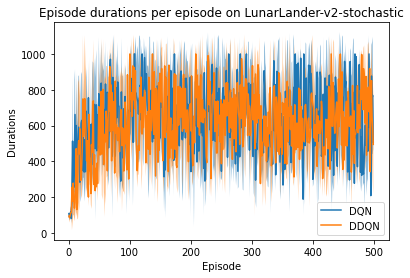

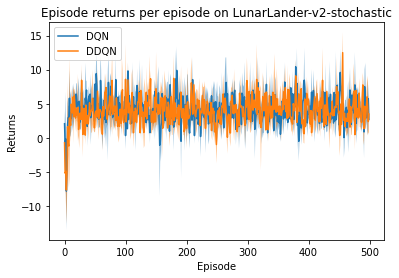

In [5]:
env_name = 'LunarLander-v2-stochastic'

n_episodes = 500
batch_size = 64
hidden_dim = 128
lr = 1e-3
gamma = 0.8
eps_start = 1.0
eps_end = 0.05
eps_decay_iters = 500
zeta = 0.05
mem_cap = 10000

seeds = [42, 126, 284]

results_cartpole = run_experiments(env_name, n_episodes, batch_size, hidden_dim, lr, gamma, 
                                   eps_start, eps_end, eps_decay_iters, zeta, mem_cap, seeds)

plot_results(results_cartpole, env_name)

Episode 0 finished after 246 steps with return -5.000000000000001
Episode 10 finished after 128 steps with return -4.999999999998033
Episode 20 finished after 180 steps with return -5.000000000000001
Episode 30 finished after 138 steps with return -4.999999999999791
Episode 40 finished after 375 steps with return -5.000000000000001
Episode 50 finished after 191 steps with return -5.000000000000001
Episode 60 finished after 495 steps with return -5.000000000000001
Episode 70 finished after 242 steps with return -5.000000000000001
Episode 80 finished after 5 steps with return -3.3616000000000006
Episode 90 finished after 197 steps with return -5.000000000000001
Episode 100 finished after 20 steps with return -4.942353924769659
Episode 110 finished after 2 steps with return -1.8
Episode 120 finished after 9 steps with return -4.328911360000001
Episode 130 finished after 127 steps with return -4.99999999999754
Episode 140 finished after 250 steps with return -5.000000000000001
Episode 150 

Episode 220 finished after 30 steps with return -4.993810299803576
Episode 230 finished after 841 steps with return -5.000000000000001
Episode 240 finished after 314 steps with return -5.000000000000001
Episode 250 finished after 7 steps with return -3.9514240000000007
Episode 260 finished after 234 steps with return -5.000000000000001
Episode 270 finished after 203 steps with return -5.000000000000001
Episode 280 finished after 381 steps with return -5.000000000000001
Episode 290 finished after 179 steps with return -5.000000000000001
Episode 300 finished after 105 steps with return -4.9999999996662545
Episode 310 finished after 246 steps with return -5.000000000000001
Episode 320 finished after 124 steps with return -4.999999999995193
Episode 330 finished after 1 steps with return 0.0
Episode 340 finished after 23 steps with return -4.970485209482066
Episode 350 finished after 21 steps with return -4.953883139815727
Episode 360 finished after 49 steps with return -4.999910797019209
E

Episode 430 finished after 10 steps with return -4.463129088000001
Episode 440 finished after 13 steps with return -4.725122093056001
Episode 450 finished after 104 steps with return -4.999999999582817
Episode 460 finished after 79 steps with return -4.99999988957206
Episode 470 finished after 54 steps with return -4.999970769967256
Episode 480 finished after 153 steps with return -4.999999999999995
Episode 490 finished after 103 steps with return -4.999999999478521
DQN ran for 98.38264966011047 seconds on Gridworld-16x16
Episode 0 finished after 67 steps with return -4.999998393061958
Episode 10 finished after 117 steps with return -4.999999999977069
Episode 20 finished after 637 steps with return -5.000000000000001
Episode 30 finished after 389 steps with return -5.000000000000001
Episode 40 finished after 345 steps with return -5.000000000000001
Episode 50 finished after 438 steps with return -5.000000000000001
Episode 60 finished after 484 steps with return -5.000000000000001
Episo

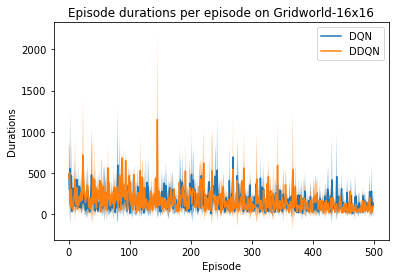

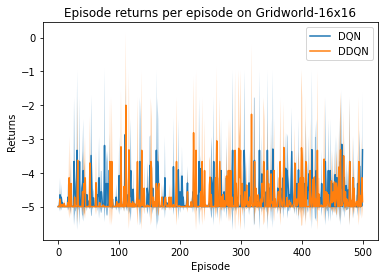

In [6]:
env_name = 'Gridworld-16x16'

n_episodes = 500
batch_size = 64
hidden_dim = 128
lr = 1e-3
gamma = 0.8
eps_start = 1.0
eps_end = 0.05
eps_decay_iters = 500
zeta = 0.05
mem_cap = 10000

seeds = [42, 126, 284]

results_cartpole = run_experiments(env_name, n_episodes, batch_size, hidden_dim, lr, gamma, 
                                   eps_start, eps_end, eps_decay_iters, zeta, mem_cap, seeds)

plot_results(results_cartpole, env_name)

Episode 0 finished after 3346 steps with return -5.000000000000001
Episode 10 finished after 34 steps with return -4.997464698799546
Episode 20 finished after 32 steps with return -4.99603859187429
Episode 30 finished after 48 steps with return -4.99988849627401
Episode 40 finished after 28 steps with return -4.990328593443086
Episode 50 finished after 78 steps with return -4.999999861965075
Episode 60 finished after 51 steps with return -4.999942910092295
Episode 70 finished after 41 steps with return -4.9994683088016885
Episode 80 finished after 34 steps with return -4.997464698799546
Episode 90 finished after 19 steps with return -4.927942405962074
Episode 100 finished after 18 steps with return -4.909928007452591
Episode 110 finished after 24 steps with return -4.976388167585654
Episode 120 finished after 27 steps with return -4.987910741803856
Episode 130 finished after 22 steps with return -4.963106511852582
Episode 140 finished after 62 steps with return -4.999995096014271
Episo

Episode 210 finished after 33 steps with return -4.996830873499432
Episode 220 finished after 17 steps with return -4.887410009315738
Episode 230 finished after 25 steps with return -4.981110534068524
Episode 240 finished after 85 steps with return -4.99999997105198
Episode 250 finished after 30 steps with return -4.993810299803576
Episode 260 finished after 24 steps with return -4.976388167585654
Episode 270 finished after 29 steps with return -4.992262874754469
Episode 280 finished after 15 steps with return -4.824078139555841
Episode 290 finished after 21 steps with return -4.953883139815727
Episode 300 finished after 27 steps with return -4.987910741803856
Episode 310 finished after 28 steps with return -4.990328593443086
Episode 320 finished after 22 steps with return -4.963106511852582
Episode 330 finished after 17 steps with return -4.887410009315738
Episode 340 finished after 17 steps with return -4.887410009315738
Episode 350 finished after 18 steps with return -4.909928007452

Episode 420 finished after 21 steps with return -4.953883139815727
Episode 430 finished after 19 steps with return -4.927942405962074
Episode 440 finished after 20 steps with return -4.942353924769659
Episode 450 finished after 17 steps with return -4.887410009315738
Episode 460 finished after 17 steps with return -4.887410009315738
Episode 470 finished after 19 steps with return -4.927942405962074
Episode 480 finished after 29 steps with return -4.992262874754469
Episode 490 finished after 18 steps with return -4.909928007452591
DQN ran for 29.297977685928345 seconds on Windy-Gridworld
Episode 0 finished after 4169 steps with return -5.000000000000001
Episode 10 finished after 153 steps with return -4.999999999999995
Episode 20 finished after 164 steps with return -5.000000000000001
Episode 30 finished after 128 steps with return -4.999999999998033
Episode 40 finished after 107 steps with return -4.999999999786404
Episode 50 finished after 139 steps with return -4.999999999999834
Epis

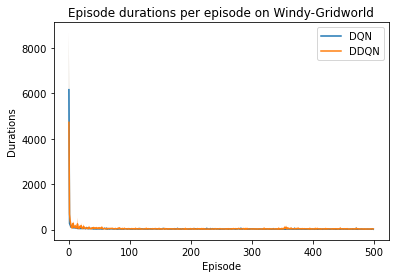

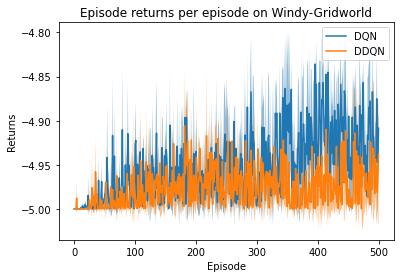

In [3]:
env_name = 'Windy-Gridworld'

n_episodes = 500
batch_size = 64
hidden_dim = 128
lr = 1e-3
gamma = 0.8
eps_start = 1.0
eps_end = 0.05
eps_decay_iters = 500
zeta = 0.05
mem_cap = 10000

seeds = [42, 126, 284]

results_cartpole = run_experiments(env_name, n_episodes, batch_size, hidden_dim, lr, gamma, 
                                   eps_start, eps_end, eps_decay_iters, zeta, mem_cap, seeds)

plot_results(results_cartpole, env_name)